In [9]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Function to calculate the histogram of an image
def calculate_histogram(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()  # Normalize the histogram
    return hist

# Function to compute Bhattacharyya distance between two histograms
def bhattacharyya_distance(hist1, hist2):
    return -np.log(np.sum(np.sqrt(hist1 * hist2)))

# Plot histograms for each image
def plot_histograms(query_hist, ref1_hist, ref2_hist):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title('Query Image Histogram')
    plt.hist(query_hist)

    plt.subplot(1, 3, 2)
    plt.title('Reference Image 1 Histogram')
    plt.hist(ref1_hist)

    plt.subplot(1, 3, 3)
    plt.title('Reference Image 2 Histogram')
    plt.hist(ref2_hist)

    plt.show()

Distance to Reference Image 1: -0.56280094
Distance to Reference Image 2: -0.9833758


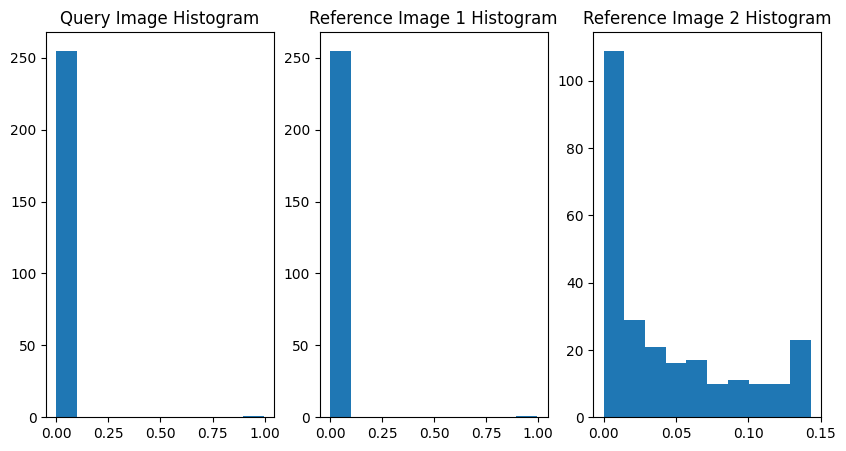

In [11]:
# Example images to be loaded for demonstration
query_image_path = 'query-image.jpg'
reference_image1_path = 'reference-image-1.jpg'
reference_image2_path = 'reference-image-2.jpg'

# Load images
query_image = cv2.imread(query_image_path)
reference_image1 = cv2.imread(reference_image1_path)
reference_image2 = cv2.imread(reference_image2_path)

# Calculate histograms
query_hist = calculate_histogram(query_image)
ref1_hist = calculate_histogram(reference_image1)
ref2_hist = calculate_histogram(reference_image2)

# Compute Bhattacharyya distances
distance_ref1 = bhattacharyya_distance(query_hist, ref1_hist)
distance_ref2 = bhattacharyya_distance(query_hist, ref2_hist)

# Print distances
print('Distance to Reference Image 1:', distance_ref1)
print('Distance to Reference Image 2:', distance_ref2)

# Plot histograms
plot_histograms(query_hist, ref1_hist, ref2_hist)